<a href="https://colab.research.google.com/github/StingrayS7/practical-work_1/blob/main/3_task_creative(mashine_failure).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача: создать и обучить модель для предсказания событий выхода из строя оборудования на производстве, опираясь на показатели датчиков.

In [ ]:
import pandas as pd
from requests import get
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
response = get("https://drive.usercontent.google.com/u/0/uc?id=1BmkDUndkHmXgJ_nRIsYp5Kvw0BxeFHzk&export=download")
with open('archive.zip', 'wb') as f:
    f.write(response.content)

In [ ]:
!unzip -qo "archive.zip" -d ./machine_failure

FILE_PATH = './machine_failure'

In [ ]:
data = pd.read_csv(f'{FILE_PATH}/data.csv')

In [ ]:
# Иформация о столбцах датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


Описание показателей

*   footfall: Количество людей или объектов, проходящих мимо оборудования
*   tempMode: Температурный режим оборудования
*   AQ: Индекс качества воздуха рядом с оборудованием
*   USS: Данные ультразвукового датчика приближения
*   CS: данные датчика потребления тока Оборудованием
*   VOC: Уровень летучих органических соединений рядом с оборудованием
*   RP: Частота вращения исполнительных элементов оборудования
*   IP: Входящее давление на оборудование
*   Temperature: Рабочая температура оборудования
*   fail: Бинарный (двоичный) индикатор исправности или неисправности оборудования (1 - неисправность, 0 - нет неисправности)








In [ ]:
# Проверка начальных значений датасета
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
# Обработка данных. Поиск нулевых значений в датасете.
miss_val = data.isnull().sum()
print(miss_val.to_markdown())

|             |   0 |
|:------------|----:|
| footfall    |   0 |
| tempMode    |   0 |
| AQ          |   0 |
| USS         |   0 |
| CS          |   0 |
| VOC         |   0 |
| RP          |   0 |
| IP          |   0 |
| Temperature |   0 |
| fail        |   0 |


<Axes: >

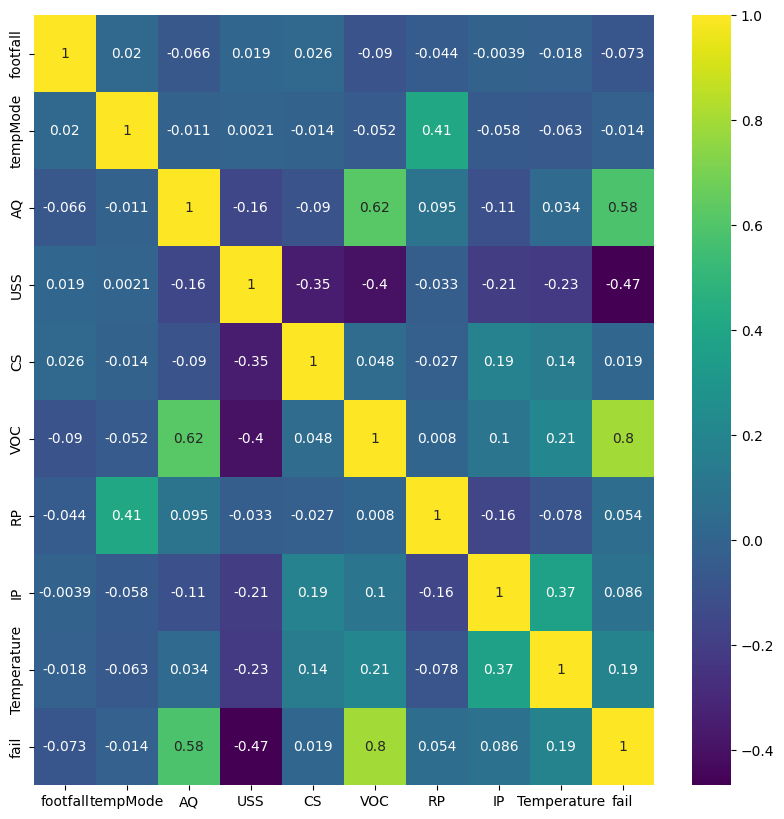

In [17]:
# Нулевых значений в датасете нет
# Создаем матрицу корреляций для выбора признаков, по которым лучше всего делать предсказывание
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="viridis", annot=True,)

In [ ]:
# Лучшими показателями судя по матрице корреляций будут AQ и VOC
fin_data = data[['AQ', 'Temperature', 'fail']]
fin_data.head(20)

,AQ,Temperature,fail
0,7,1,1
1,3,1,0
2,2,1,0
3,3,1,0
4,5,1,0
5,3,1,0
6,5,1,0
7,5,1,0
8,4,1,0
9,3,1,0


In [ ]:
# Подготовим тренировочные и тестовые данные
X = fin_data.drop('fail', axis=1).values
y = fin_data['fail'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
# Создание модели нейронной сети
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

# Модель 4 слоя, оптимизатор Adam, активаторы relu и sigmoid, функция потерь - бинарная перекрестная энтропия
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Тренируем модель 100 эпох
model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
19/19 [==============================] - 3s 15ms/step - loss: 2.6482 - accuracy: 0.4172 - val_loss: 2.5211 - val_accuracy: 0.3974
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 2.0789 - accuracy: 0.4172 - val_loss: 1.9909 - val_accuracy: 0.3974
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 1.6517 - accuracy: 0.4172 - val_loss: 1.5875 - val_accuracy: 0.3974
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 1.3291 - accuracy: 0.4172 - val_loss: 1.2849 - val_accuracy: 0.3974
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 1.0992 - accuracy: 0.4172 - val_loss: 1.0662 - val_accuracy: 0.4040
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 0.9396 - accuracy: 0.4288 - val_loss: 0.9231 - val_accuracy: 0.4040
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.8364 - accuracy: 0.4338 - val_loss: 0.8309 - val_accuracy: 0.4172
Epoch 8/100


In [ ]:
# Проверяем модель на тестовых данных
res = model.evaluate(X_test, y_test)
print('Тестовая ошибка, тестовая точность:', res)

6/6 [==============================] - 0s 5ms/step - loss: 0.4977 - accuracy: 0.7513
Тестовая ошибка, тестовая точность: [0.49772515892982483, 0.7513227462768555]


При обучении модели на данном датасете можно наблюдать высокий показатель обучающей и валидационной ошибок, а так же недостаточную точность модели. Возможное решение: использование более крупного датасета.